In [92]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

ALLOWED_NAMES = {
    k: v for k, v in np.__dict__.items() if not k.startswith("__")
}

def f(function, x, x1, x2, d1, d2):
  return eval(function, {"__builtins__": {}, "x": x, "x1": x1, "x2": x2, "d1": d1, "d2": d2}, ALLOWED_NAMES)

def goldenSectionSearch(function, a, b, x1, x2, d1, d2):
  goldenRatio = (5**(1/2) - 1) / (2)
  e = 1e-6
  time = 0
  timeout = 100
  xa, xb = 0, 0

  while time < timeout:
    d = goldenRatio * (b - a)
    xa = a + d
    xb = b - d
    fxa = f(function, xa, x1, x2, d1, d2)
    fxb = f(function, xb, x1, x2, d1, d2)

    if math.fabs(xb - xa) < e:
      break

    if fxa > fxb:
      b = xa
    elif fxb > fxa:
      a = xb

    time += 1

  return [xa, fxa]

In [93]:


def plot3D(function, min, range=5):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.set_title(f'f(x) = {function}', fontsize=10)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    x1 = np.arange(-range, range, 0.15)
    x2 = np.arange(-range, range, 0.15)
    x1, x2 = np.meshgrid(x1, x2)
    z = eval(function, {"__builtins__": {}, "x1": x1, "x2": x2}, ALLOWED_NAMES)

    ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap='viridis', label=f'f(x) = {function}')
    
    ax.scatter(min[0], min[1], color='red', label=f'Mínimo')

def plotContour(function, min, range=5):
    fig = plt.figure()
    ax = fig.add_subplot()

    ax.set_title(f'f(x) = {function}', fontsize=10)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    x1 = np.arange(-range, range, 0.15)
    x2 = np.arange(-range, range, 0.15)
    x1, x2 = np.meshgrid(x1, x2)
    z = eval(function, {"__builtins__": {}, "x1": x1, "x2": x2}, ALLOWED_NAMES)

    ax.contour(x1, x2, z, colors='blue')
    
    ax.scatter(min[0], min[1], color='red', label=f'Mínimo')

    plt.show()



lmbda0: 3.128173868824198 => y0: [3.128173868824198, 3.0]
lmbda1: -1.4359118495805663 => y1: [3.128173868824198, 1.5640881504194337]
lmbda^1: -0.09723372252538973 => y3: [2.8240098788517707, 1.7037072047724697] d:[3.128173868824198,-1.4359118495805663]
a1 = [ 3.12817387 -1.43591185] d1 = [ 0.90882638 -0.41717456]
a2 = [ 0.         -1.43591185] d2 = [-0.41717456 -0.90882638]
b2 = [-0.54441054 -1.18601348] d2 = [-0.41717456 -0.90882638]
[[ 0.90882638 -0.41717456]
 [-0.41717456 -0.90882638]]
lmbda0: 1.1134737526692074e-06 => y0: [2.824010890806088, 1.7037067402595443]
lmbda1: 0.5131104006899724 => y1: [2.6099542839539764, 1.2373784735212041]
lmbda^1: -1.857303610528694e-06 => y3: [2.6099546815202057, 1.2373793396352404] d:[-0.21405559489779424,-0.4663287312512656]
a1 = [-0.21405559 -0.46632873] d1 = [-0.41717259 -0.90882728]
a2 = [-0.21405661 -0.46632827] d2 = [-0.90882728  0.41717259]
b2 = [-1.01195533e-06  4.64510729e-07] d2 = [-0.90882728  0.41717259]
[[-0.41717259 -0.90882728]
 [-0.90

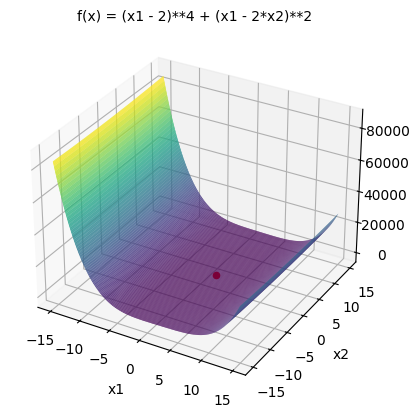

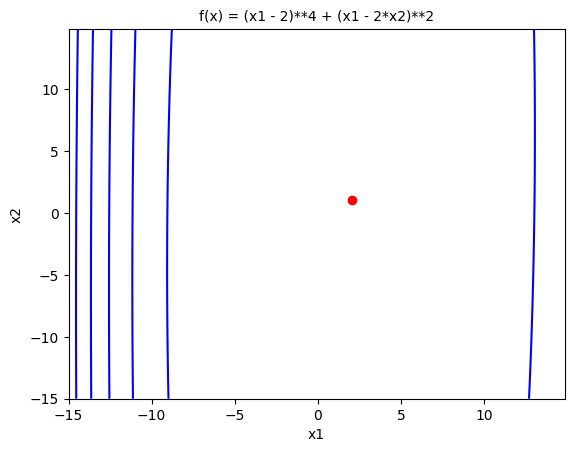

In [94]:
def granSchimdt (results, d, dim):
    a1 = 0
    a2 = 0
    b2 = 0

    for i in range(dim):
        if i == 0:
            for j in range(dim):
                a1 += results[j] * d[j]
                    
            d[i] = a1 / LA.norm(a1)

            print(f'a1 = {a1} d1 = {d[0]}')
        else:
            for j in range(1, dim):
                a2 += results[j] * d[j]

            for j in range(dim-1):
                b2 += (np.transpose(a2) @ d[j]) * d[j]
            
            b2 = a2 - b2

            d[i] = b2 / LA.norm(b2)

            print(f'a2 = {a2} d2 = {d[1]}')
            print(f'b2 = {b2} d2 = {d[1]}')

def rosenbrook(function, initialValue, dim):
    x1, x2 = initialValue[0], initialValue[1]
    nextValue = np.array(["(x1 + x*d1)", "(x2 + x*d2)"])
    nextFunc = function.replace("x1", nextValue[0]).replace("x2", nextValue[1])

    d = np.array(
            [[1.0,0.0], 
            [0.0,1.0]]
    )

    e = 1e-6
    k = 0
    timeout = 100
    time = 0
    
    while time < timeout:
        start = np.array([x1, x2])
        end = np.array([0, 0])
        results = []

        for k in range(dim):          
            d1, d2 = d[k][0], d[k][1]

            [x, y] = goldenSectionSearch(nextFunc, x1-10 if k == 0 else x2-10, x1+10 if k == 0 else x2+10, x1, x2, d1, d2)
            results.append(x)
            x1, x2 = eval(nextValue[0]), eval(nextValue[1])

            print(f'lmbda{k}: {x} => y{k}: [{x1}, {x2}]')

            if k == dim-1:
                end = np.array([x1, x2])

        resultd = end - start

        if LA.norm(resultd) < e:
            break
        
        d1, d2 = resultd[0], resultd[1]

        [x, y] = goldenSectionSearch(nextFunc, x1-10 if k == 0 else x2-10, x1+10 if k == 0 else x2+10, x1, x2, d1, d2)

        x1, x2 = eval(nextValue[0]), eval(nextValue[1])

        print(f'lmbda^{k}: {x} => y3: [{x1}, {x2}] d:[{d1},{d2}]')

        granSchimdt(results, d, dim)
        print(d)

        time += 1

    return end
    
function = "(x1 - 2)**4 + (x1 - 2*x2)**2"
initialValue = np.array([0, 3])

min = rosenbrook(function, initialValue, 2)

print(min)

plot3D(function, min, 15)
plotContour(function, min, 15)